In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [36]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('Justice Department', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536550121.0
2018-09-09 20:28:41
US backtracks on Russian spy suspect offering sex for access
130
2
1535721300.0
2018-08-31 06:15:00
Justice Department Files Statement of Interest in Harvard Discrimination Case Defending Claim That Harvard Intentionally Discriminates on the Basis of Race in Admissions
42
3
1534302614.0
2018-08-14 20:10:14
Royal Bank of Scotland Agrees to Pay $4.9 Billion for Financial Crisis-Era Misconduct
68
4
1533591311.0
2018-08-06 14:35:11
Police violence, cliques, and secret tattoos: fears rise over LA sheriff 'gangs'
624
5
1531466215.0
2018-07-13 00:16:55
U.S. Justice Department to appeal approval of AT&T acquisition of Time Warner
70
6
1531455766.0
2018-07-12 21:22:46
Justice Department appeals Time Warner-AT&T merger approval
543
7
1531442542.0
2018-07-12 17:42:22
Justice Department reopens investigation into 63-year-old murder of Emmett Till
109
8
1528943413.0
2018-06-13 19:30:13
U.S. Justice Department to focus on discrimination against houses of 

In [37]:
#Give name
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536550e+09,2018-09-09 20:28:41,US backtracks on Russian spy suspect offering ...,130
1,1.535721e+09,2018-08-31 06:15:00,Justice Department Files Statement of Interest...,42
2,1.534303e+09,2018-08-14 20:10:14,Royal Bank of Scotland Agrees to Pay $4.9 Bill...,68
3,1.533591e+09,2018-08-06 14:35:11,"Police violence, cliques, and secret tattoos: ...",624
4,1.531466e+09,2018-07-13 00:16:55,U.S. Justice Department to appeal approval of ...,70
5,1.531456e+09,2018-07-12 21:22:46,Justice Department appeals Time Warner-AT&T me...,543
6,1.531443e+09,2018-07-12 17:42:22,Justice Department reopens investigation into ...,109
7,1.528943e+09,2018-06-13 19:30:13,U.S. Justice Department to focus on discrimina...,28
8,1.528856e+09,2018-06-12 19:14:27,DOJ sues University of Michigan over bias resp...,35
9,1.528500e+09,2018-06-08 16:11:50,Veteran of Senate Intel Committee charged with...,452


In [48]:
##filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [49]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536550e+09,2018-09-09 20:28:41,US backtracks on Russian spy suspect offering ...,130
1,3,1.533591e+09,2018-08-06 14:35:11,"Police violence, cliques, and secret tattoos: ...",624
2,5,1.531456e+09,2018-07-12 21:22:46,Justice Department appeals Time Warner-AT&T me...,543
3,6,1.531443e+09,2018-07-12 17:42:22,Justice Department reopens investigation into ...,109
4,9,1.528500e+09,2018-06-08 16:11:50,Veteran of Senate Intel Committee charged with...,452
5,10,1.528482e+09,2018-06-08 11:16:06,Justice Department takes aim at heart of healt...,156
6,11,1.527192e+09,2018-05-24 12:57:39,US Justice Department reportedly opens crimina...,297
7,12,1.526456e+09,2018-05-16 00:30:41,Justice Department and F.B.I. Are Investigatin...,208
8,14,1.524290e+09,2018-04-20 22:47:21,Justice Department demands info from all four ...,14099
9,15,1.523681e+09,2018-04-13 21:43:10,Former F.B.I. Deputy Director Is Faulted in Sc...,433


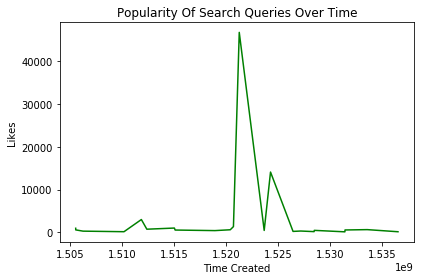

In [50]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()